# Brainhack School 2023 Final Project
by Wei-Chen Chang(張瑋宸)

## Data Source:
<a src="https://openneuro.org/datasets/ds002424/versions/1.2.0/download">OpenNeuro</a >

In [7]:
##We need to take a look of the data...
! ls data/ds002424

CHANGES			  sub-14  sub-35  sub-56  sub-77
README			  sub-15  sub-36  sub-57  sub-78
code			  sub-16  sub-37  sub-58  sub-79
dataset_description.json  sub-17  sub-38  sub-59  task-SLD_bold.json
participants.json	  sub-18  sub-39  sub-60  task-SLD_events.json
participants.tsv	  sub-19  sub-40  sub-61  task-SLI_bold.json
phenotype		  sub-20  sub-41  sub-62  task-SLI_events.json
stimuli			  sub-21  sub-42  sub-63  task-SSD_bold.json
sub-01			  sub-22  sub-43  sub-64  task-SSD_events.json
sub-02			  sub-23  sub-44  sub-65  task-SSI_bold.json
sub-03			  sub-24  sub-45  sub-66  task-SSI_events.json
sub-04			  sub-25  sub-46  sub-67  task-VLD_bold.json
sub-05			  sub-26  sub-47  sub-68  task-VLD_events.json
sub-06			  sub-27  sub-48  sub-69  task-VLI_bold.json
sub-07			  sub-28  sub-49  sub-70  task-VLI_events.json
sub-08			  sub-29  sub-50  sub-71  task-VSD_bold.json
sub-09			  sub-30  sub-51  sub-72  task-VSD_events.json
sub-10			  sub-31  sub-52  sub-73  task-VSI_bold.json
sub-11			  sub-3

Visuao-spatial, Large reward, Delayed/Immediate reward (task-VLD or task-VLI) would be our main interest.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

sub = pd.read_csv('/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/participants.tsv', sep='\t')

sub.groupby(by=["ADHD_diagnosis","sex"]).count() #full sample 

samp = sub[pd.notnull(sub.VLD_datetime) & pd.notnull(sub.VLI_datetime)] #sample w/ VLD and VLI
samp[["participant_id","sex","ADHD_diagnosis"]]
samp.groupby(by=["ADHD_diagnosis","sex"]).count()[["participant_id","VLD_datetime","VLI_datetime"]]

participant_id  VLD_datetime  VLI_datetime
ADHD_diagnosis sex                                            
0              1                28            28            28
               2                14            14            14
1              1                30            30            30

In [2]:
#sub[pd.notnull(sub.VLD_datetime)]["participant_id"].to_numpy()

In [4]:
#The behavioral data
#pd.read_csv('/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_events.tsv', sep='\t')

onset  duration   trial_type  correct_response  accuracy  \
0      4.014       1.8  no_response               NaN       1.0   
1      5.820       2.0       1-back               0.0       1.0   
2      7.826       2.0       1-back               0.0       1.0   
3      9.832       2.0       1-back               1.0       0.0   
4     11.838       2.0       1-back               0.0       1.0   
..       ...       ...          ...               ...       ...   
115  246.811       2.0     baseline               NaN       1.0   
116  248.851       2.0     baseline               1.0       1.0   
117  250.890       2.0     baseline               1.0       1.0   
118  252.930       2.0     baseline               NaN       1.0   
119  254.969       2.0     baseline               NaN       1.0   

     response_time        stimulus position  
0              NaN               c       TR  
1            0.928               g       BL  
2            0.591               p       TR  
3            0.250               p       BL  
4            0.557               t       TL  
..             ...             ...      ...  
115            NaN  blackcross.bmp      NaN  
116          0.492             NaN      NaN  
117          0.475             NaN      NaN  
118            NaN  blackcross.bmp      NaN  
119            NaN  blackcross.bmp      NaN  

[120 rows x 8 columns]

In [3]:
ADHD=samp[samp.ADHD_diagnosis==1]['participant_id'].to_numpy()
control_m=samp[(samp.ADHD_diagnosis==0) & (samp.sex==1)]['participant_id'].to_numpy()


Theere're 72 participants that complete VLD and VLI, 42 of them are control participants and 30 participants with ADHD. 28 out of 42 controls are male, and all 30 ADHD participants are male.

### View Anatomical Images

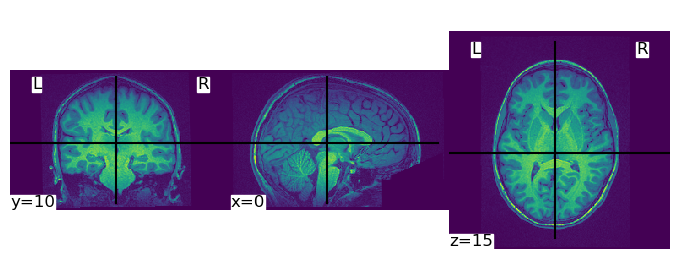

In [4]:
##Check anatomical image
#import nilearn as ni
from nilearn import plotting
sub02 = "/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/anat/sub-02_ses-T1_T1w.nii.gz"
plotting.plot_img(sub02)
#header02=nib.load(sub02)
#print(header02)
#plotting.view_img(sub02) #Dynamic

### View Functional Images

/home/wcnoname5/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



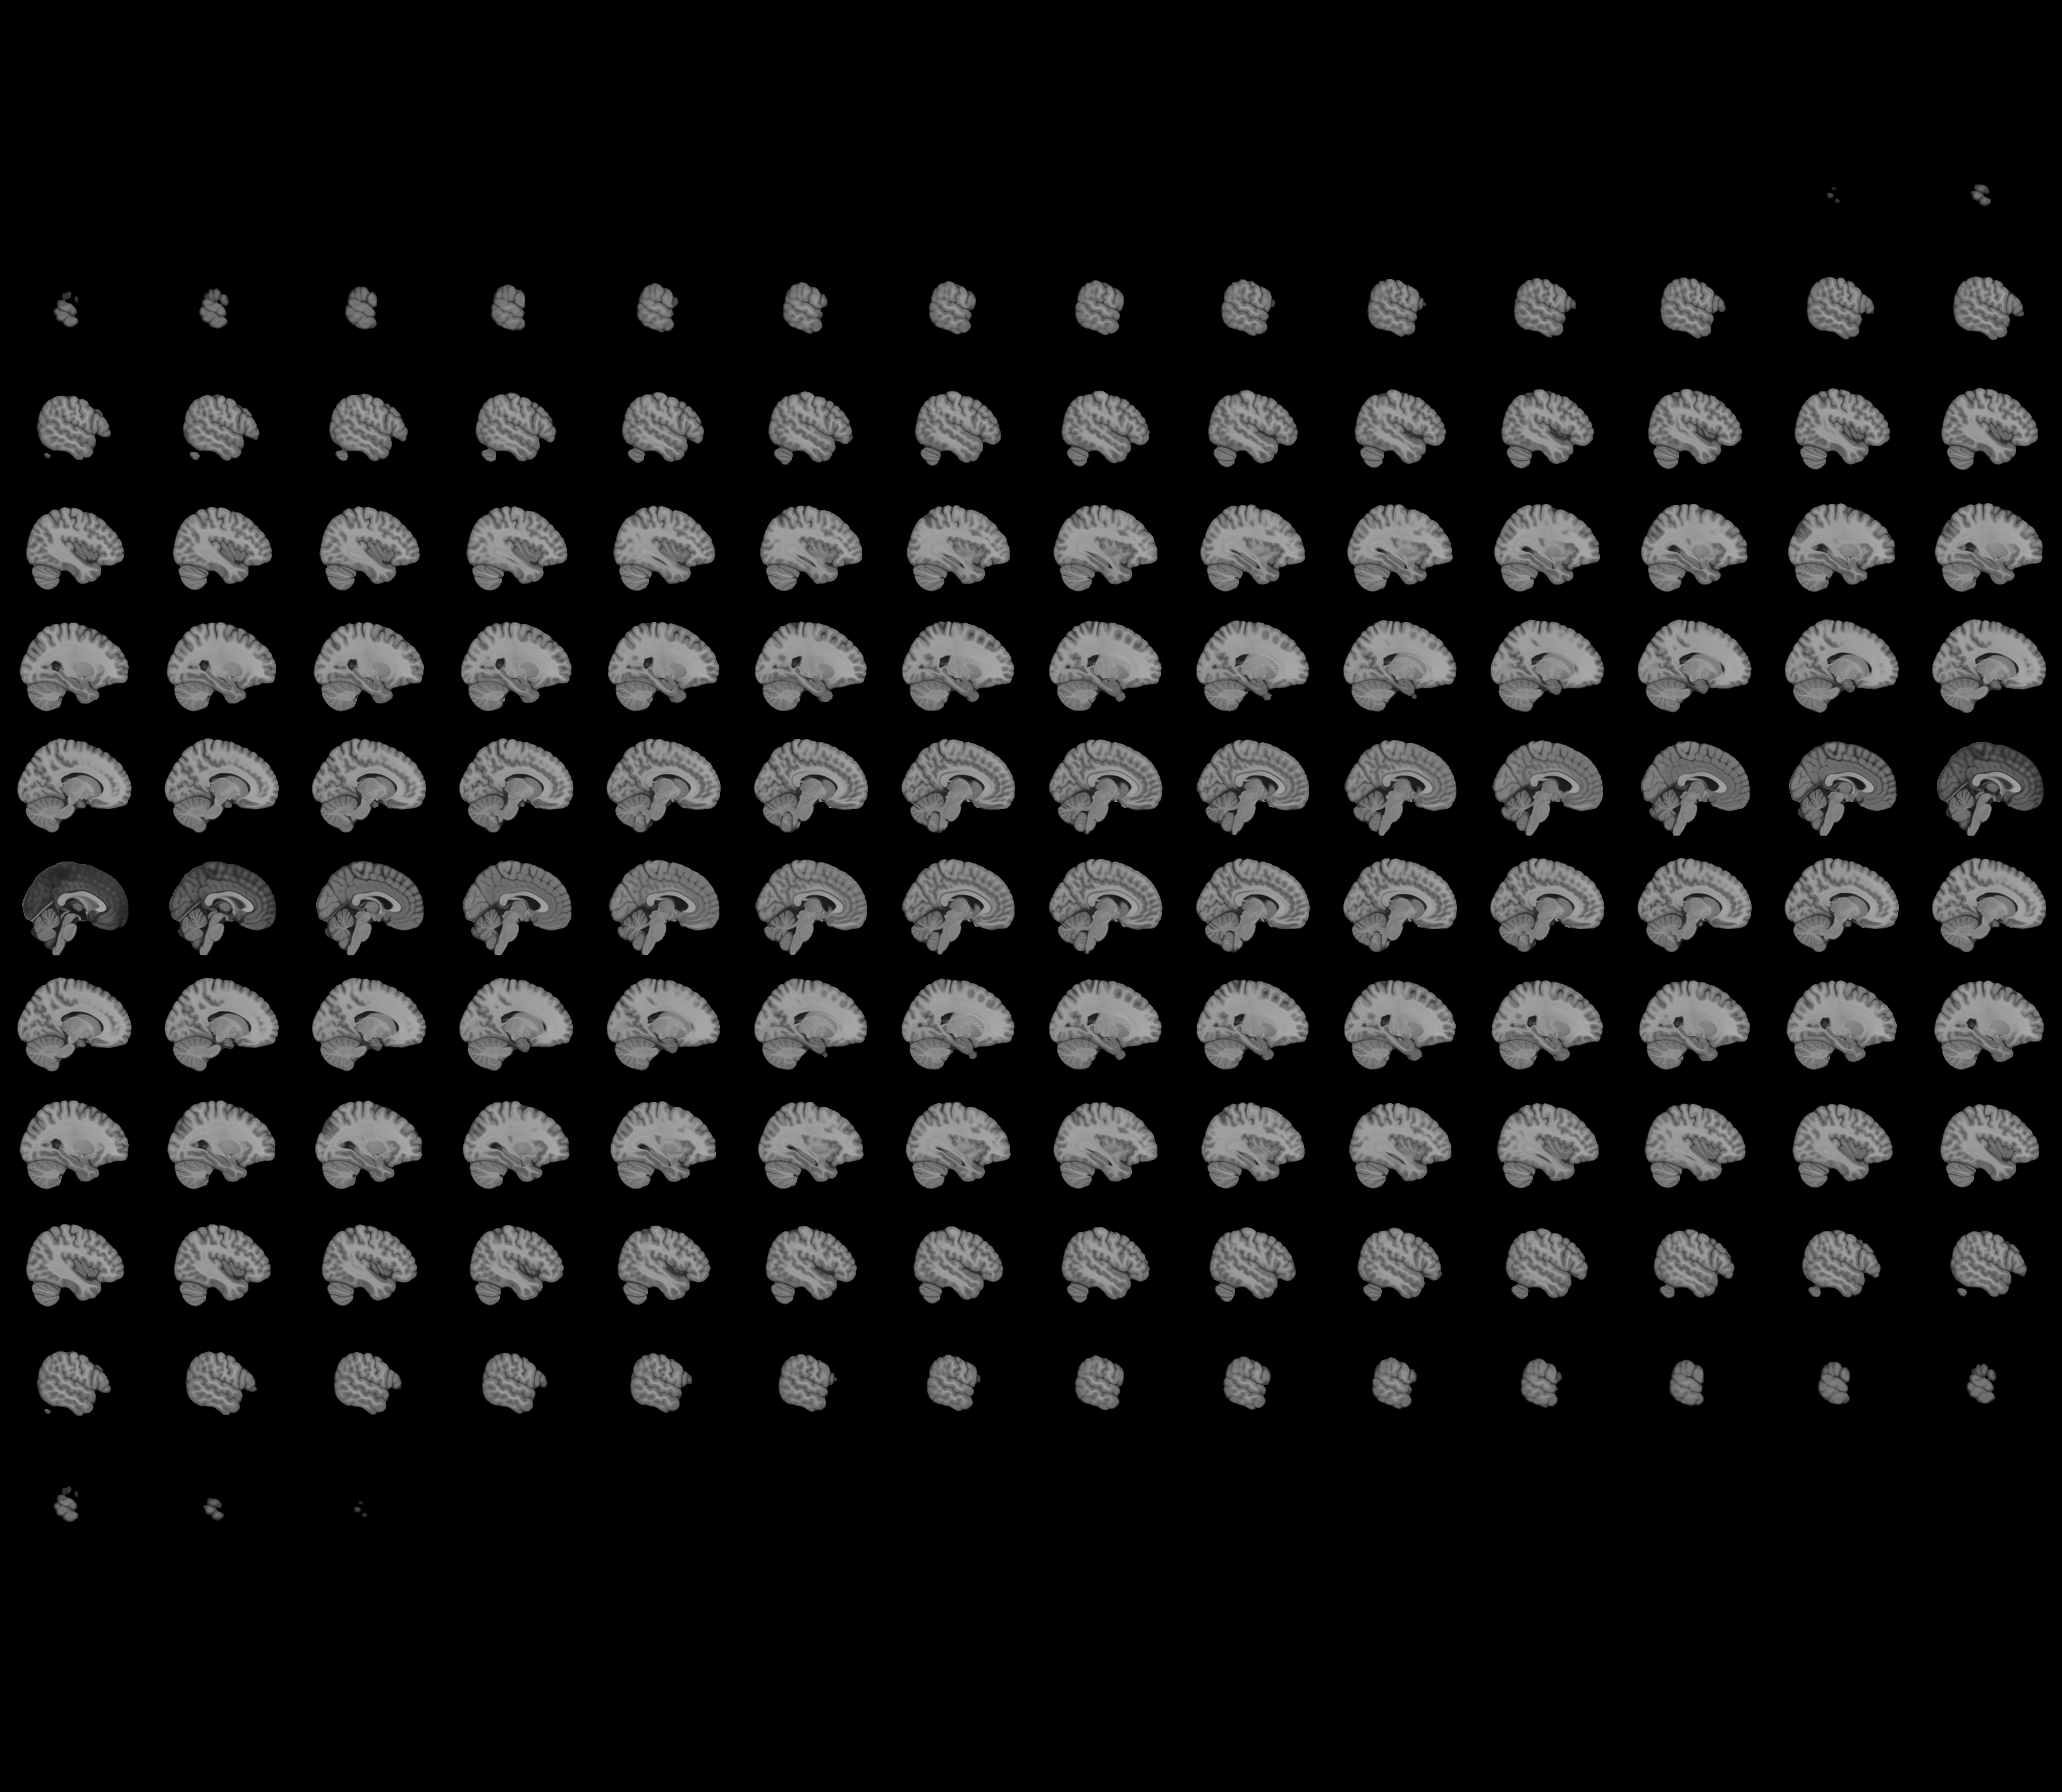
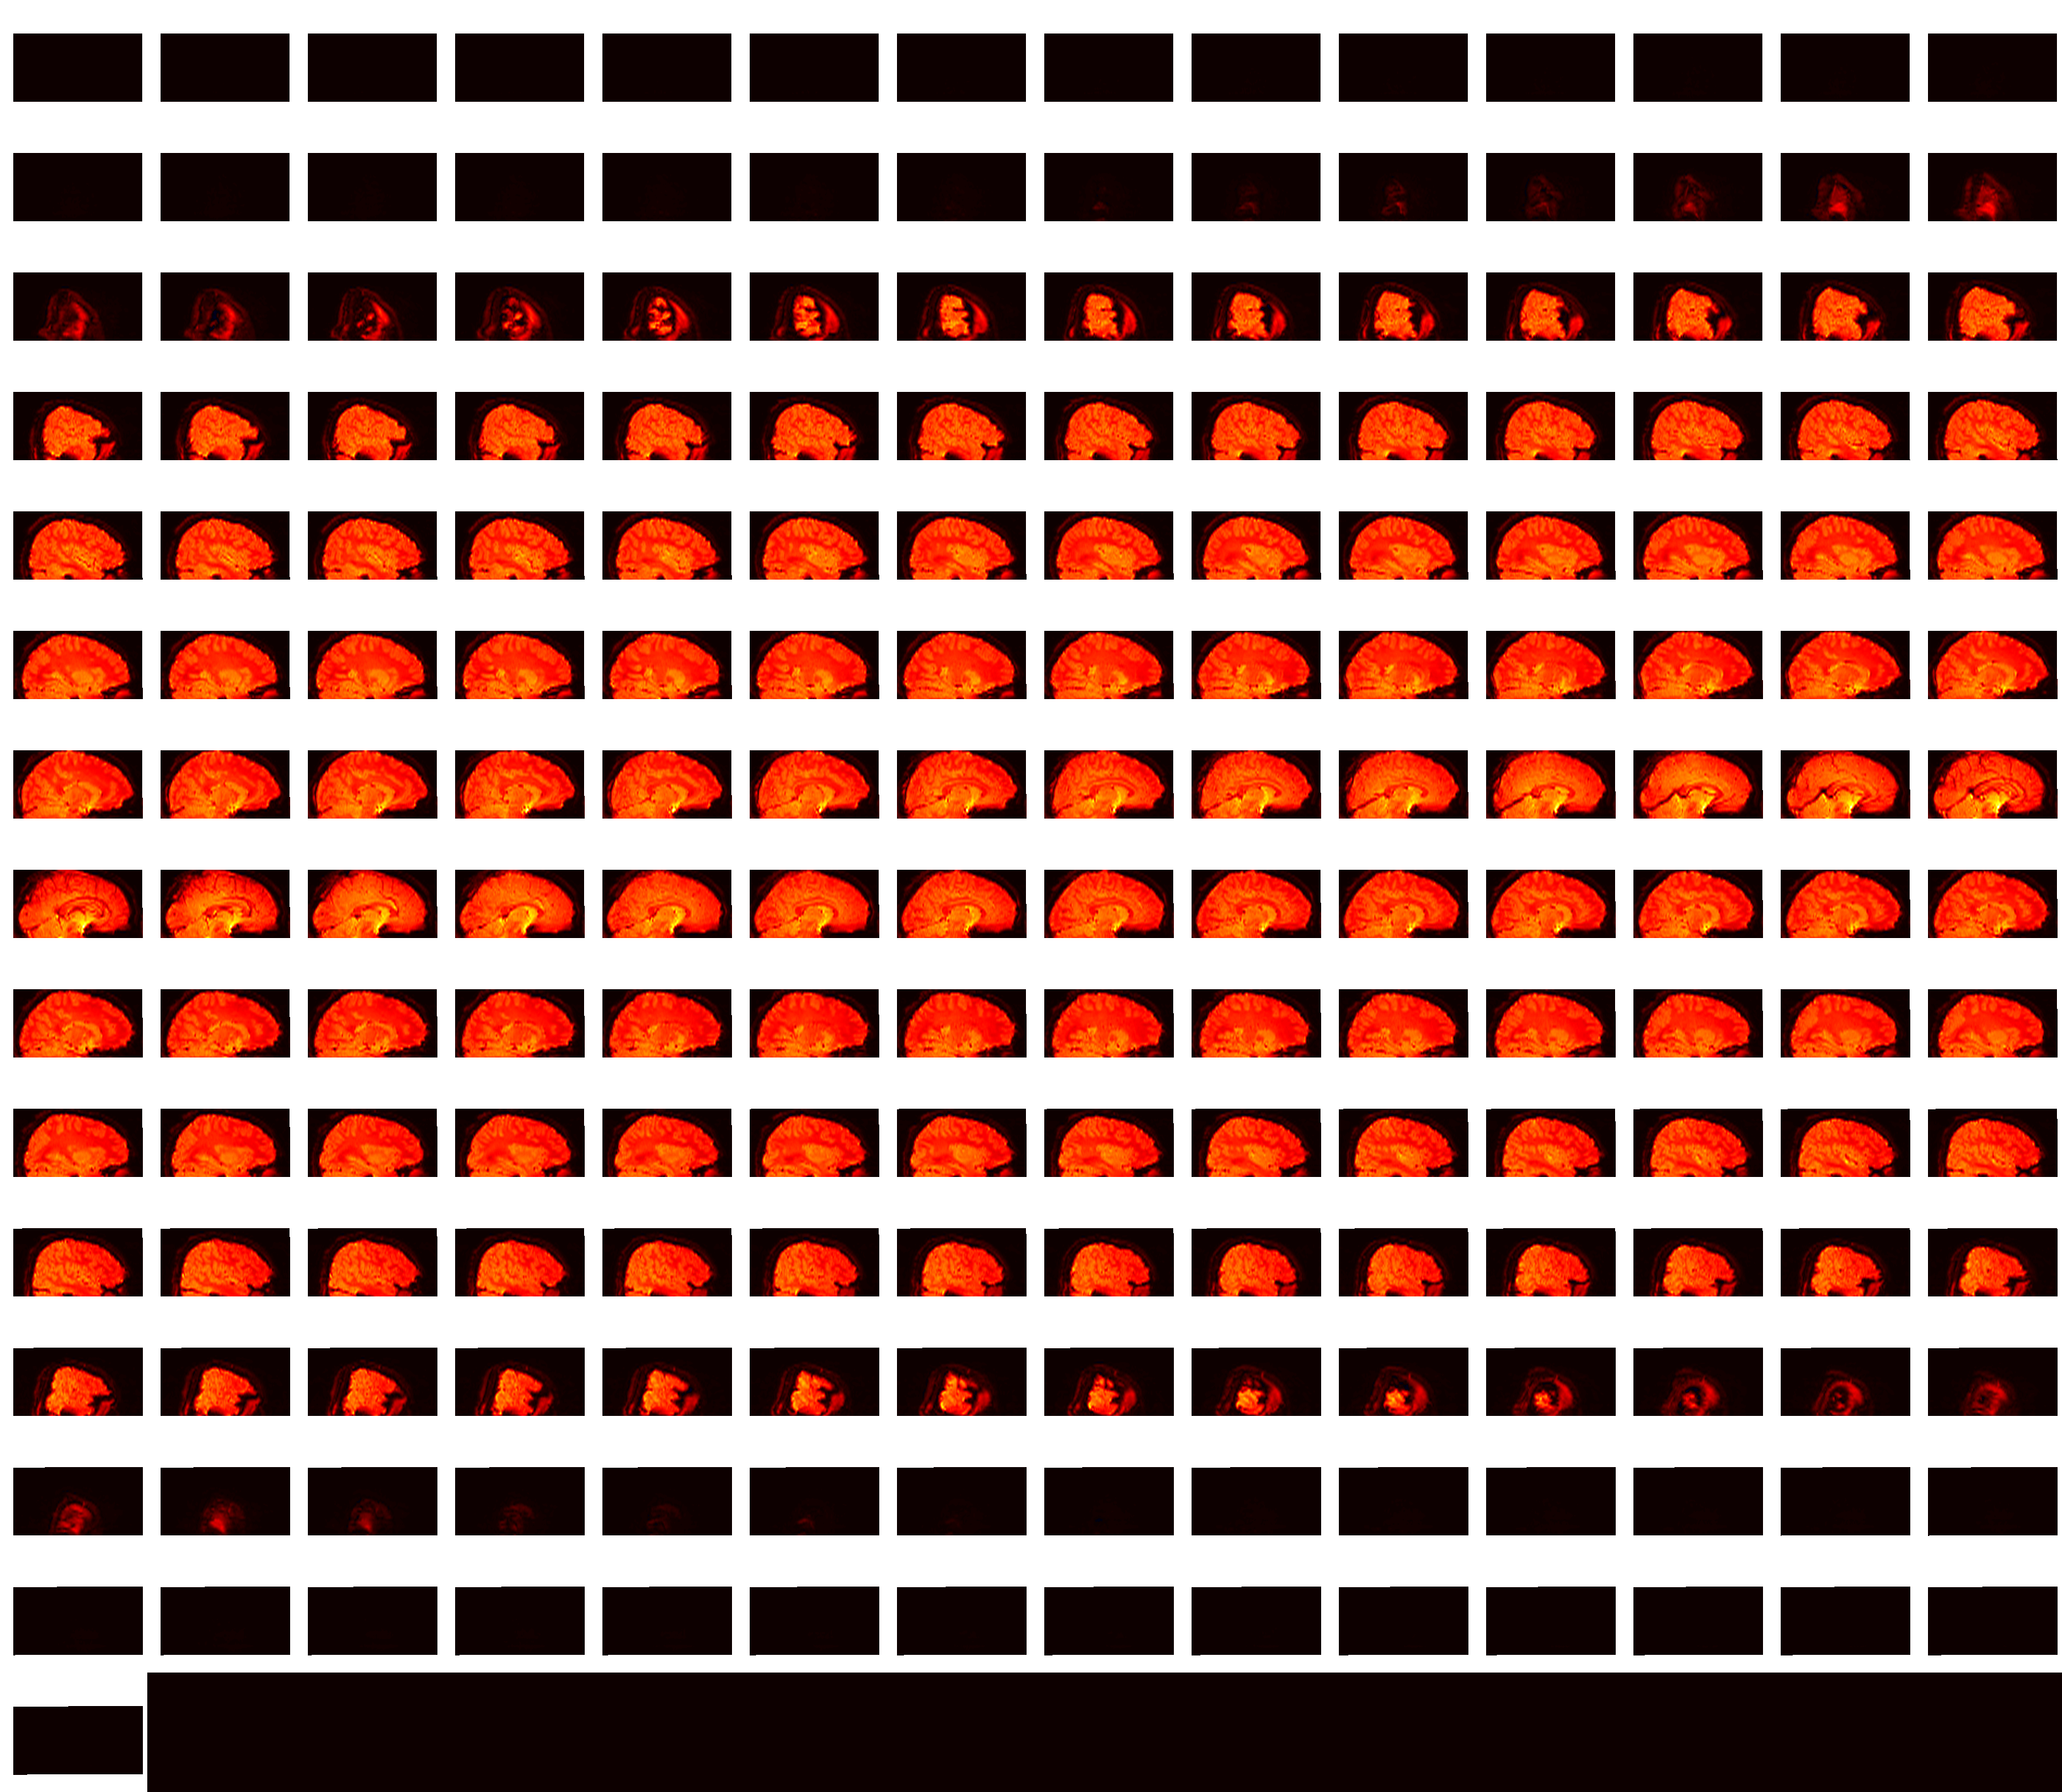

In [5]:
sub02_VLD = "/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_bold.nii.gz"
# Since our fmri_img is a 4D NiftiImage, we need to generate a 3D one.
from nilearn.image.image import mean_img

fmri_img_mean = mean_img(sub02_VLD)
#plotting.view_img(fmri_img_mean)
fmri_img_mean.shape

plotting.view_img(fmri_img_mean)


In [36]:
import nibabel as nib
print(nib.load(sub02_VLD).header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 57
dim             : [  4 128 120  32 139   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.       1.71875  1.71875  3.48     2.       0.       0.       0.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 31
slice_code      : alternating increasing 2
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.035
toffset         : 0.0
glmax           : 2805
glmin           : 0
descrip         : b'VLD'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.0013504509
quatern_c       : 0.9996852
quatern_d       : 0.020925097
qoffset_x       : 112.0

## Connectivity
<a href= https://nilearn.github.io/stable/auto_examples/03_connectivity/plot_group_level_connectivity.html#sphx-glr-auto-examples-03-connectivity-plot-group-level-connectivity-py>Nilearn Example for group-level connnectivity</a>

#### Problems here and still working on it (2023/05/25)
How do I create a confound from what I have now? (It means a lot for further connectivity analysis).

In [6]:
from nilearn.maskers import NiftiMasker
from nilearn import datasets
msdl_data = datasets.fetch_atlas_msdl()
msdl_coords = msdl_data.region_coords
n_regions = len(msdl_coords)
print(
    "MSDL has {0} ROIs, part of the following networks :\n{1}.".format(
        n_regions, msdl_data.networks
    )
)

MSDL has 39 ROIs, part of the following networks :
['Aud', 'Aud', 'Striate', 'DMN', 'DMN', 'DMN', 'DMN', 'Occ post', 'Motor', 'R V Att', 'R V Att', 'R V Att', 'R V Att', 'Basal', 'L V Att', 'L V Att', 'L V Att', 'D Att', 'D Att', 'Vis Sec', 'Vis Sec', 'Vis Sec', 'Salience', 'Salience', 'Salience', 'Temporal', 'Temporal', 'Language', 'Language', 'Language', 'Language', 'Language', 'Cereb', 'Dors PCC', 'Cing-Ins', 'Cing-Ins', 'Cing-Ins', 'Ant IPS', 'Ant IPS'].


In [7]:
from nilearn.maskers import NiftiMasker

masker = NiftiMasker()
masked_data = masker.fit_transform(sub02_VLD)
masked_data.shape

(139, 491364)

Now I can't using `msdl` to mask the `sub02_VLD`, which is a `nii.gz` functional imaging file....

In [9]:
from nilearn.maskers import NiftiMapsMasker

atlas_masker = NiftiMapsMasker(maps_img=msdl_data, standardize=True)

#data_in_atlas = atlas_masker.fit_transform(sub02_VLD)#, confounds=data.confounds)
#data_in_atlas.shape

In [ ]:
from nilearn.maskers import NiftiMapsMasker

masker = NiftiMapsMasker(
    msdl_data.maps,
    resampling_target="data",
    t_r=2,
    detrend=True,
    low_pass=0.1,
    high_pass=0.01,
    memory="nilearn_cache",
    memory_level=1,
    standardize="zscore_sample",
).fit()

In [31]:
#development_dataset = datasets.fetch_development_fmri(n_subjects=1)
e=development_dataset.confounds
print(e[0])
pd.read_csv(e[0], sep='\t')

/home/wcnoname5/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv


trans_x   trans_y   trans_z         rot_x     rot_y     rot_z  \
0   -0.000233 -0.076885  0.062321  7.322780e-04  0.000352  0.000841   
1   -0.006187 -0.078395  0.056773  1.122190e-04  0.000187  0.000775   
2   -0.000227 -0.069893  0.083102  1.434700e-04  0.000364  0.000716   
3    0.002492 -0.074707  0.060337  2.016850e-04  0.000818  0.000681   
4   -0.000226 -0.084204  0.085079  1.834170e-04  0.000548  0.000682   
..        ...       ...       ...           ...       ...       ...   
163 -0.017332  0.014066 -0.014854  1.288150e-04 -0.000566  0.000916   
164 -0.019105 -0.115073 -0.034933  8.338870e-04 -0.000510  0.000633   
165 -0.011159  0.002433 -0.022185  2.650120e-04 -0.000805  0.000731   
166 -0.015082 -0.132366 -0.026921  1.284910e-03 -0.000788  0.000686   
167 -0.026896  0.018479  0.000021 -5.293960e-23 -0.000487  0.000716   

     framewise_displacement  a_comp_cor_00  a_comp_cor_01  a_comp_cor_02  \
0                  0.000000      -0.099871      -0.007286       0.001780   
1                  0.055543      -0.019437      -0.042308       0.016735   
2                  0.054112       0.009096      -0.053206      -0.030388   
3                  0.057667       0.060195      -0.083195       0.003578   
4                  0.051438       0.049833      -0.089819      -0.020825   
..                      ...            ...            ...            ...   
163                0.238491      -0.012716       0.056354       0.015468   
164                0.203179       0.026579       0.113651      -0.025939   
165                0.186323      -0.084232       0.140013       0.041006   
166                0.197564      -0.002535       0.201289      -0.041035   
167                0.270377      -0.031971       0.047669       0.075863   

     a_comp_cor_03  a_comp_cor_04  a_comp_cor_05         csf  white_matter  
0        -0.008073       0.030945      -0.022393  439.699409    451.645460  
1        -0.012099       0.088777      -0.006171  439.471640    451.103437  
2        -0.052925       0.019922       0.014776  439.744498    450.981505  
3        -0.037011       0.026946       0.002505  440.772620    450.600261  
4        -0.079329       0.008516      -0.000938  440.115442    450.678959  
..             ...            ...            ...         ...           ...  
163      -0.018283       0.069908      -0.015623  444.820171    453.743564  
164       0.006790      -0.056386      -0.143115  444.618416    453.760129  
165      -0.022548       0.045866       0.035185  445.764668    454.113252  
166       0.016435      -0.121567       0.069279  445.859847    453.644592  
167       0.008067       0.037244       0.150211  442.777147    453.523174  

[168 rows x 15 columns]